# EDA on Algerian Forest Fires Dataset

## DATA COLLECTION AND UNDERSTANDING
        I used a dataset on Algerian Forest Fires from UCI. 
        The dataset contains a culmination of forest fire observations and data in two regions of Algeria:
        the Bejaia region and the Sidi Bel-Abbes region. 
        The timeline of this dataset is from June 2012 to September 2012. 
        


# DATA EXPLORATION
In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire
by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn.
It is always a good practice to understand the data first and try to gather as many insights from it.
Below are tasks to be performed in EDA:

1. Importing Libraries

2. Data Cleaning for EDA Report

3. Exploratory Data Analysis (EDA) on all Features

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# loading the csv data file
df1=pd.read_csv("Algerian_forest_fires_dataset_UPDATE (6) (1).csv",header=1)

In [6]:
#copy the original data frame
df=df1.copy()

In [4]:
# head of the dataset
df.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
# tail of the dataset
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [9]:
# summary on descriptive statisics of the dataset
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [10]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### .Looks like all the features are identified as object but can be converted into numeric, if we remove rows which has strings.

In [11]:
# to know how many rows and columns are present in the dataset
df.shape

(246, 14)

In [ ]:
# i.e the dataset has 246 rows and 14 columns

# Data Cleaning

In [12]:
df.duplicated().sum()

0

##### there are no duplicate values in the dataset

In [13]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [14]:
df[df["month"].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### from the above we can see that the data set data about two regions.They are
            i.Bejaia Region 
            ii.Sidi-Bel Abbes Region

In [15]:
df.drop(index=122,inplace=True)

### as there are two regions we create a new column region to know the region

In [16]:
df.loc[:122,"Region"]=1
df.loc[123:,"Region"]=2

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [20]:
df.drop(index=123,axis=0,inplace=True)

In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [22]:
# as we see that the names of columns are having extra spaces.we try to remove it.
df.columns=df.columns.str.strip()

In [23]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [27]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype("int")

In [28]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype("float")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int32(6), object(1)
memory usage: 24.7+ KB


### Data Cleaning in target variable

In [30]:
df["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [31]:
df["Classes"]=df["Classes"].str.strip()

In [32]:
df["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [33]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


## Region 1 (Bejaia Region)


In [35]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1.0
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1.0
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1.0
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1.0


## Region 2 (Sidi-Bel Abbes Region)

In [36]:
df[123:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
125,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2.0
126,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2.0
127,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2.0
128,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2.0
129,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2.0
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2.0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2.0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2.0


# Exploratory Data Analysis (EDA)

In [37]:
df["Classes"]=df["Classes"].replace("not fire",0)

In [39]:
df["Classes"]=df["Classes"].replace("fire",1)

In [40]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0


In [42]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2.0
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2.0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2.0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2.0
245,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,2.0


In [43]:
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [44]:
# Percentage for PieChart
percentage = df.Classes.value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

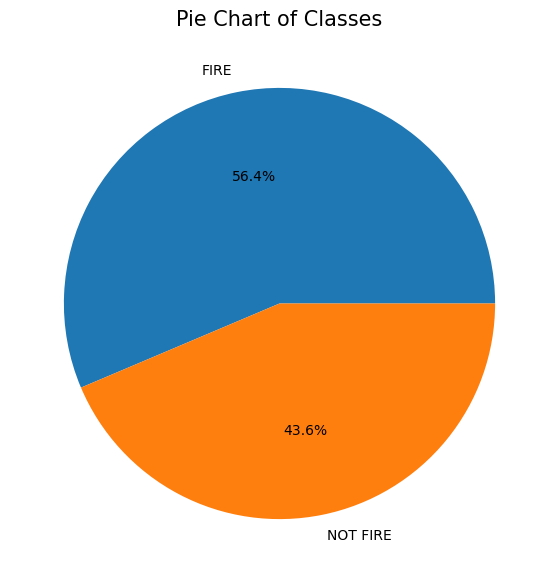

In [45]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

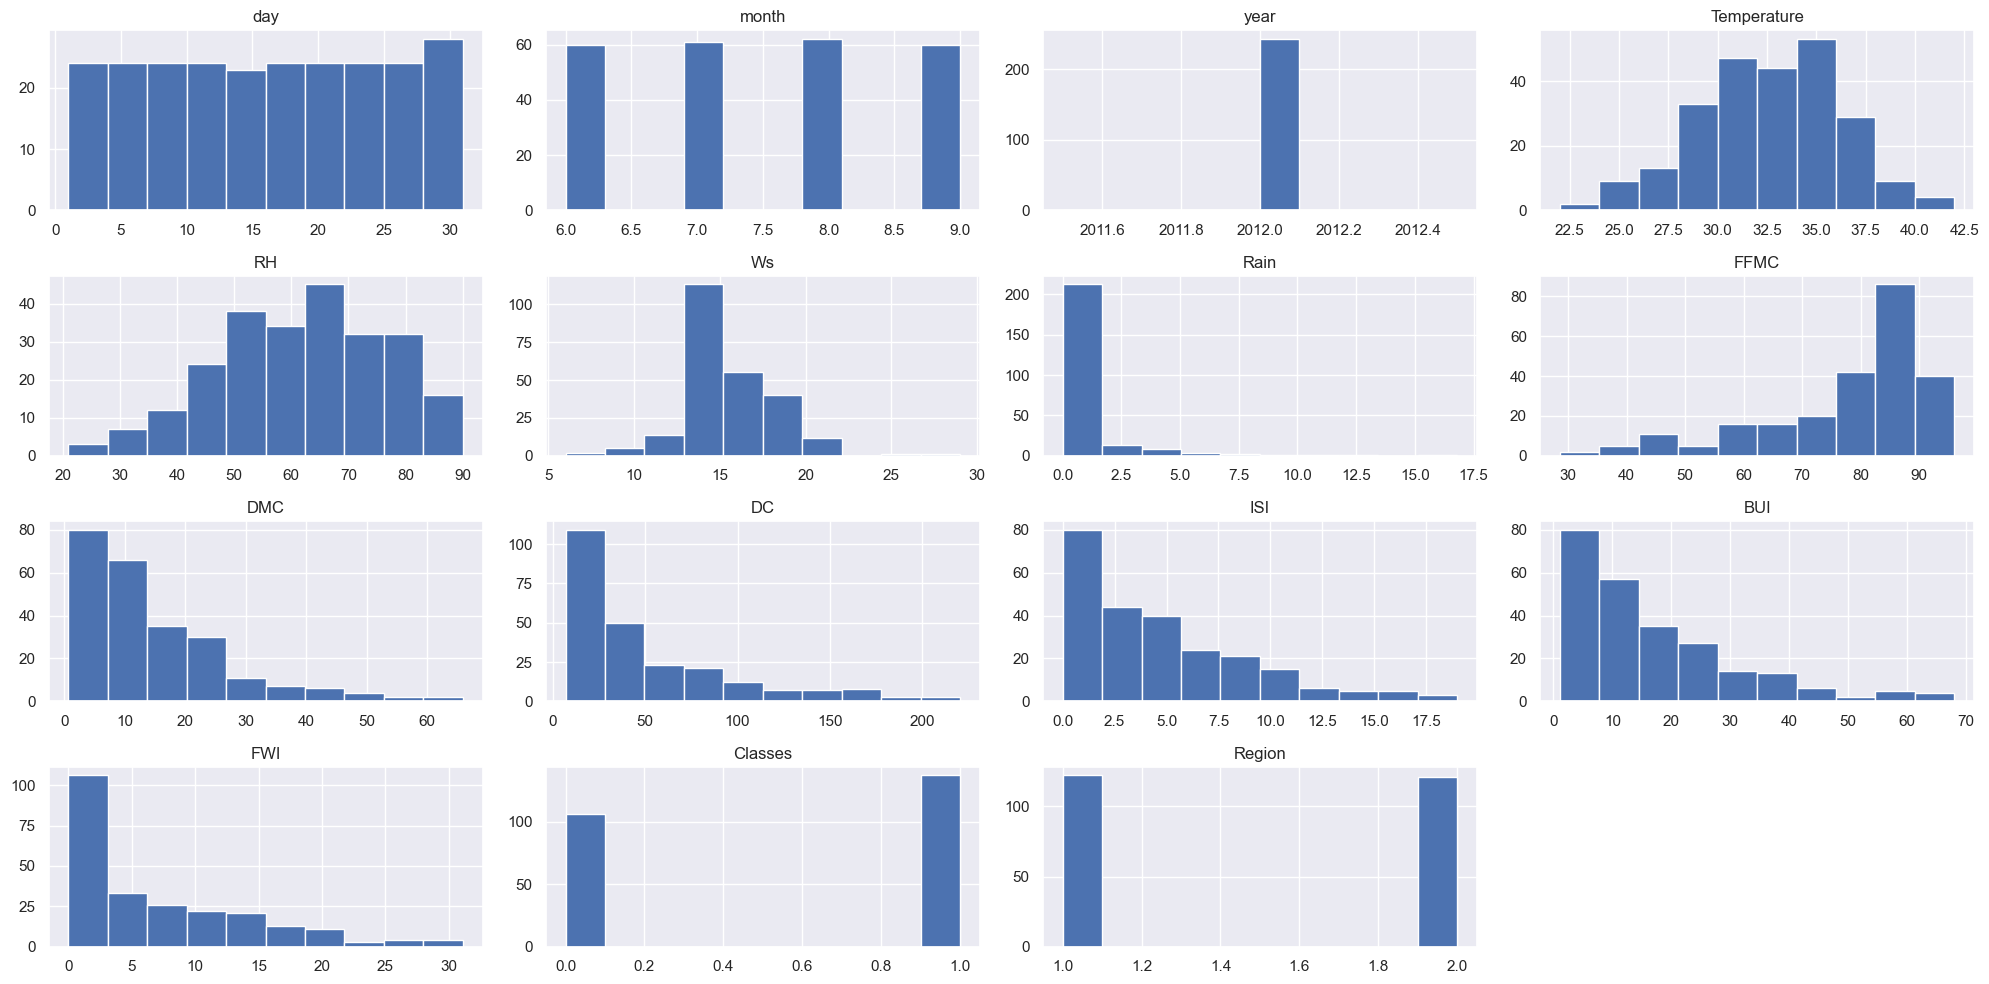

In [50]:

df.hist()
sns.set(rc={"figure.figsize":(20,10)})
plt.tight_layout()
plt.show()

In [52]:
a=df.corr()

<Axes: >

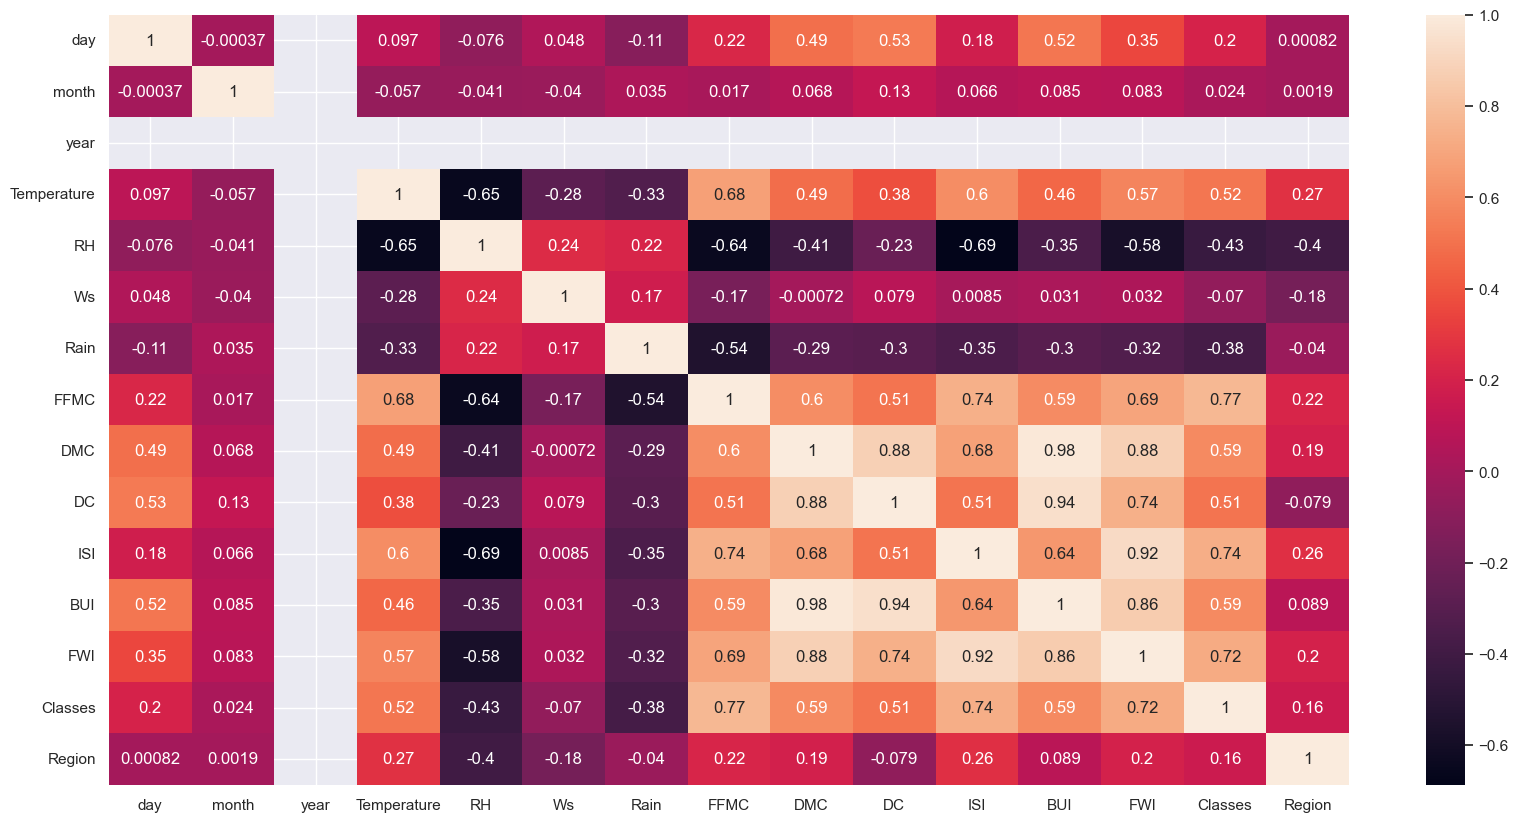

In [54]:
sns.heatmap(data=a,annot=True)

## Monthwise Fire Analysis

#### for region 1

([<matplotlib.axis.XTick at 0x22eb061d1b0>,
 [Text(0, 0, 'june'),
  Text(1, 0, 'july'),
  Text(2, 0, 'august'),
  Text(3, 0, 'september')])

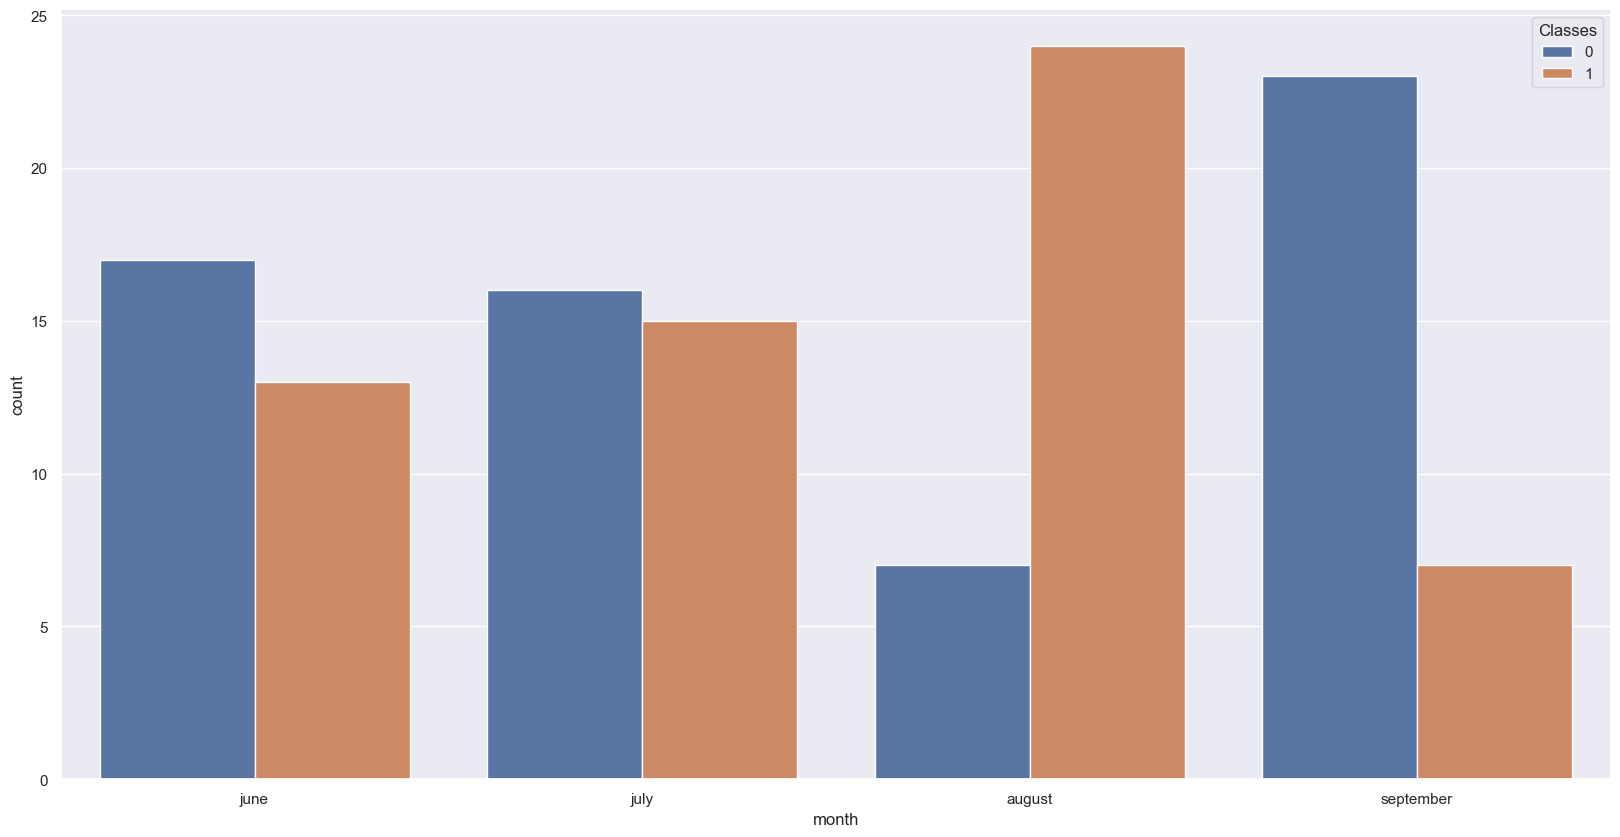

In [56]:
sns.countplot(data=df[:122],x="month",hue="Classes")
plt.xticks(np.arange(4),["june","july","august","september"])

#### for region 2

([<matplotlib.axis.XTick at 0x22eb0687ca0>,
 [Text(0, 0, 'june'),
  Text(1, 0, 'july'),
  Text(2, 0, 'august'),
  Text(3, 0, 'september')])

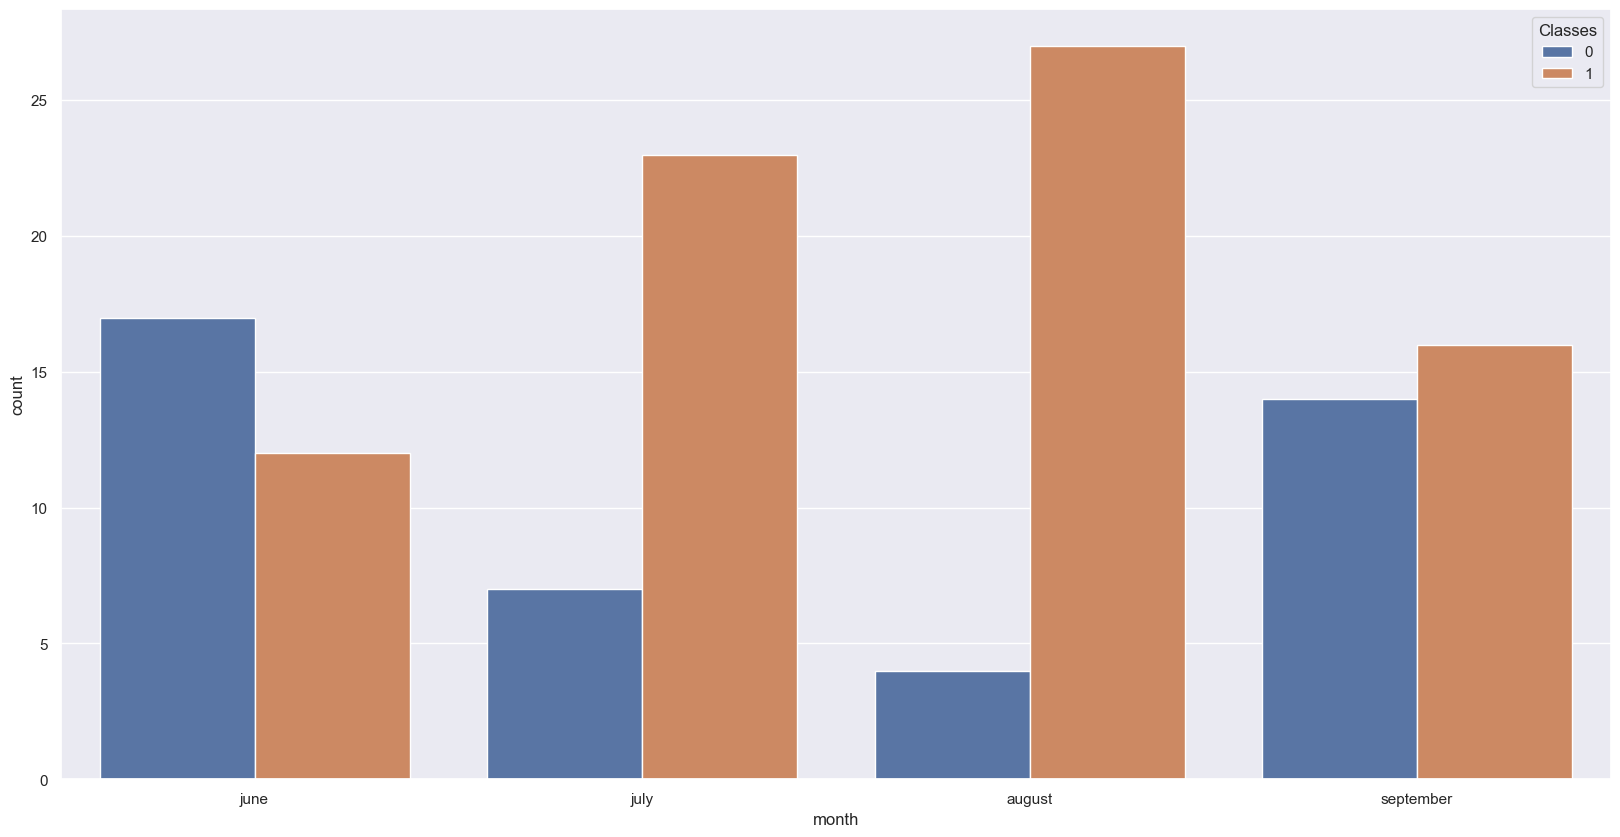

In [57]:
sns.countplot(data=df[123:],x="month",hue="Classes")
plt.xticks(np.arange(4),["june","july","august","september"])

## Its observed that August and july had the most number of forest fires for both regions.
    And from the above plot of months, we can understand few things
    Most of the fires happened in August.
    

In [58]:
se=df.groupby(["Temperature"],as_index=False)["Classes"].sum()

In [59]:
se

,Temperature,Classes
0,22,0
1,24,0
2,25,0
3,26,1
4,27,1
5,28,3
6,29,5
7,30,7
8,31,16
9,32,12


Text(0, 0.5, 'fire count')

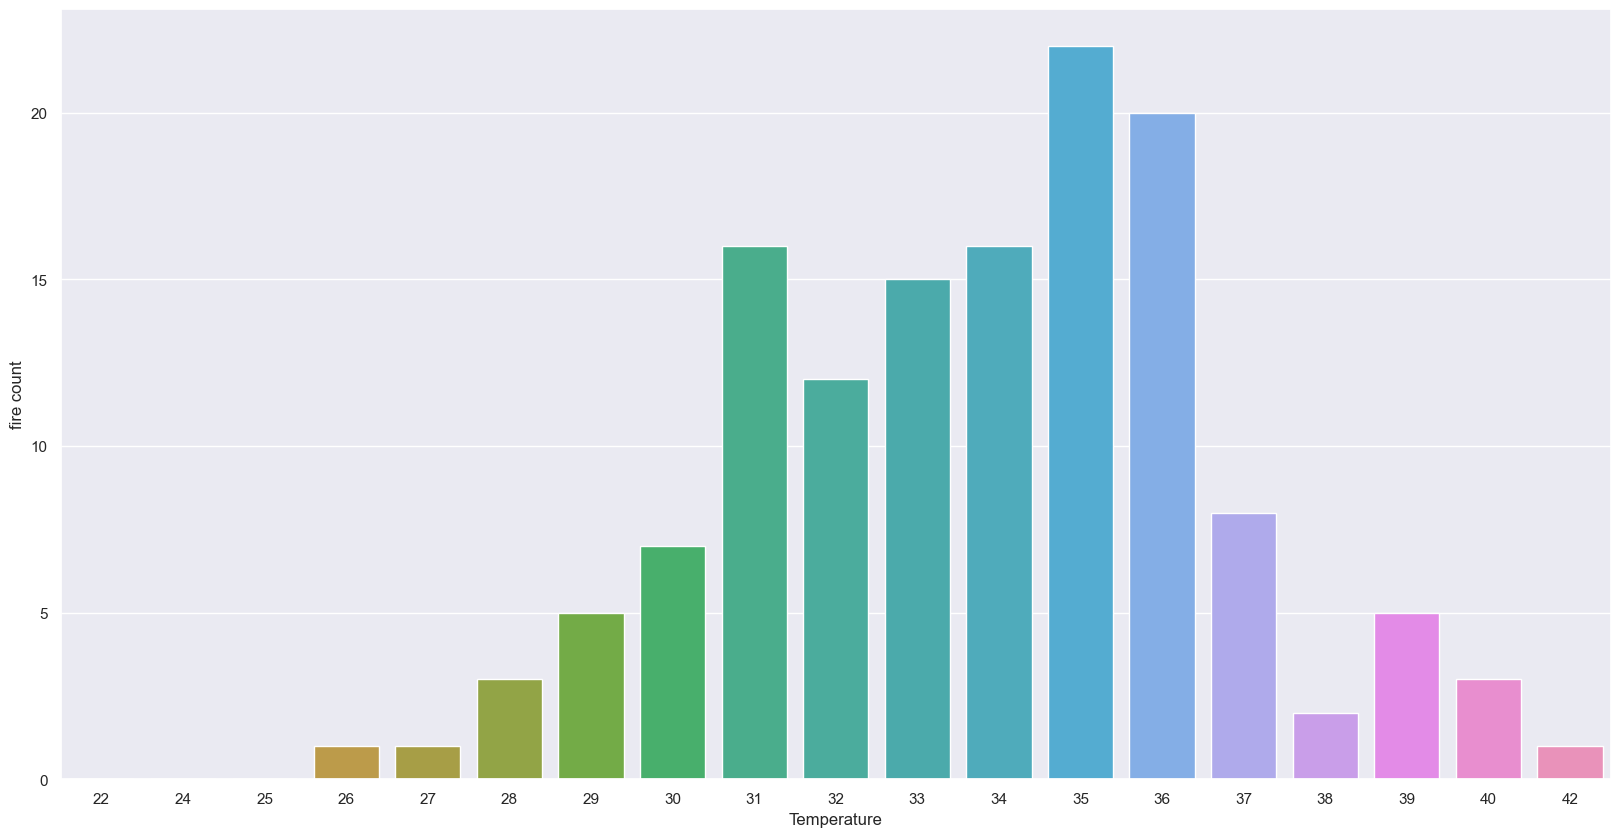

In [62]:
sns.barplot(data=se,x="Temperature",y="Classes")
plt.ylabel("fire count")

In [63]:
sw=df.groupby(["RH"],as_index=False)["Classes"].sum()
sw

,RH,Classes
0,21,1
1,24,1
2,26,1
3,29,1
4,31,1
...,...,...
57,86,0
58,87,0
59,88,1
60,89,0


Text(0.5, 0, 'relative humidity')

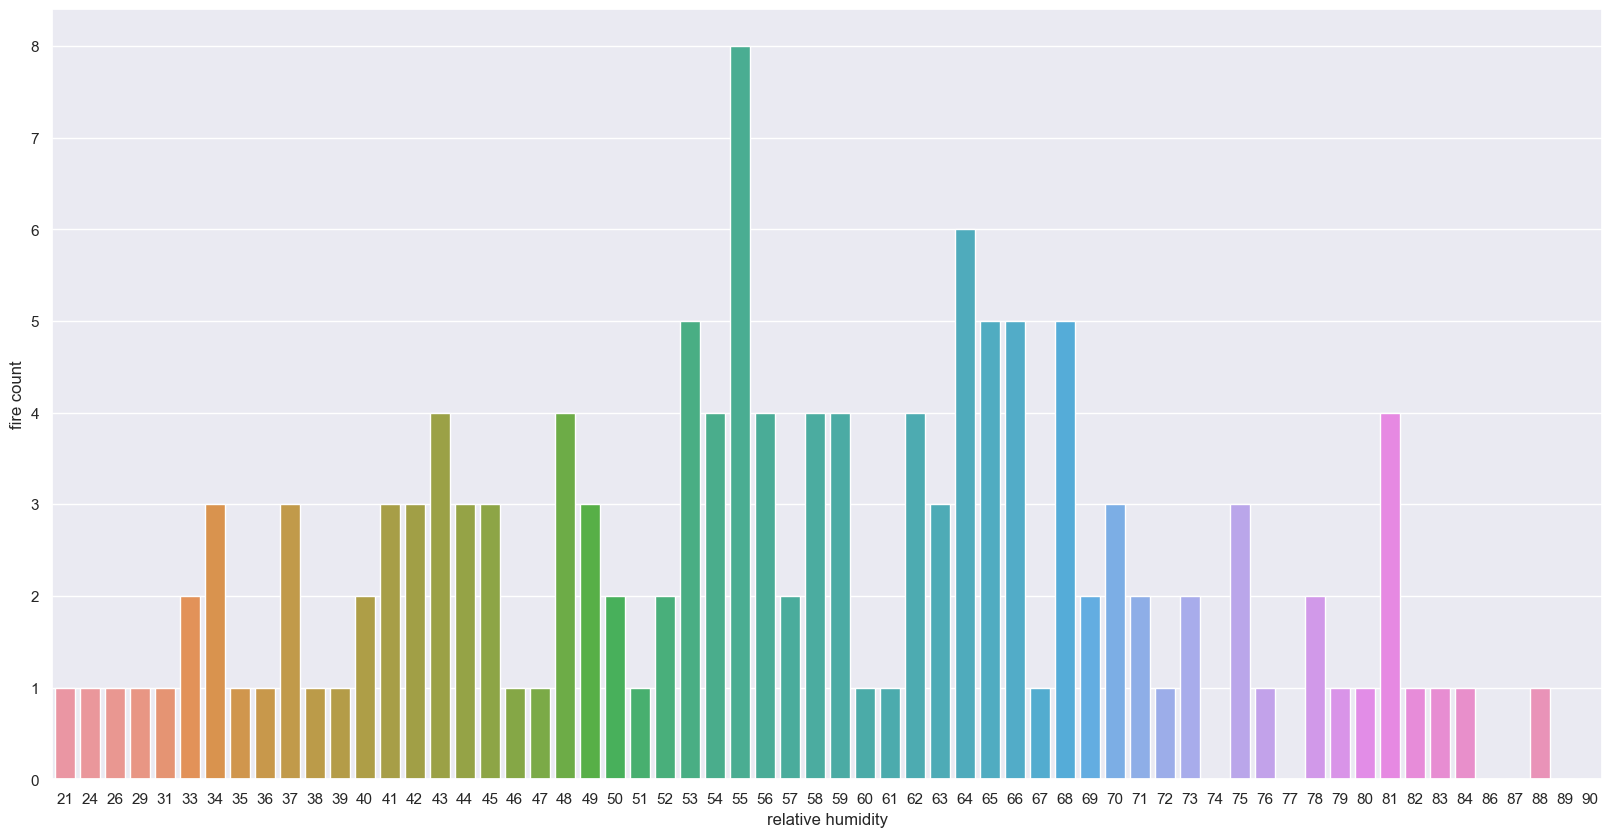

In [73]:
sns.barplot(data=sw,x="RH",y="Classes")
plt.ylabel("fire count")
plt.xlabel("relative humidity")

In [68]:
sq=df.groupby(["Ws"],as_index=False)["Classes"].sum()
sq

,Ws,Classes
0,6,0
1,8,1
2,9,1
3,10,1
4,11,5
5,12,2
6,13,17
7,14,24
8,15,25
9,16,17


Text(0.5, 0, 'wind speed per hr')

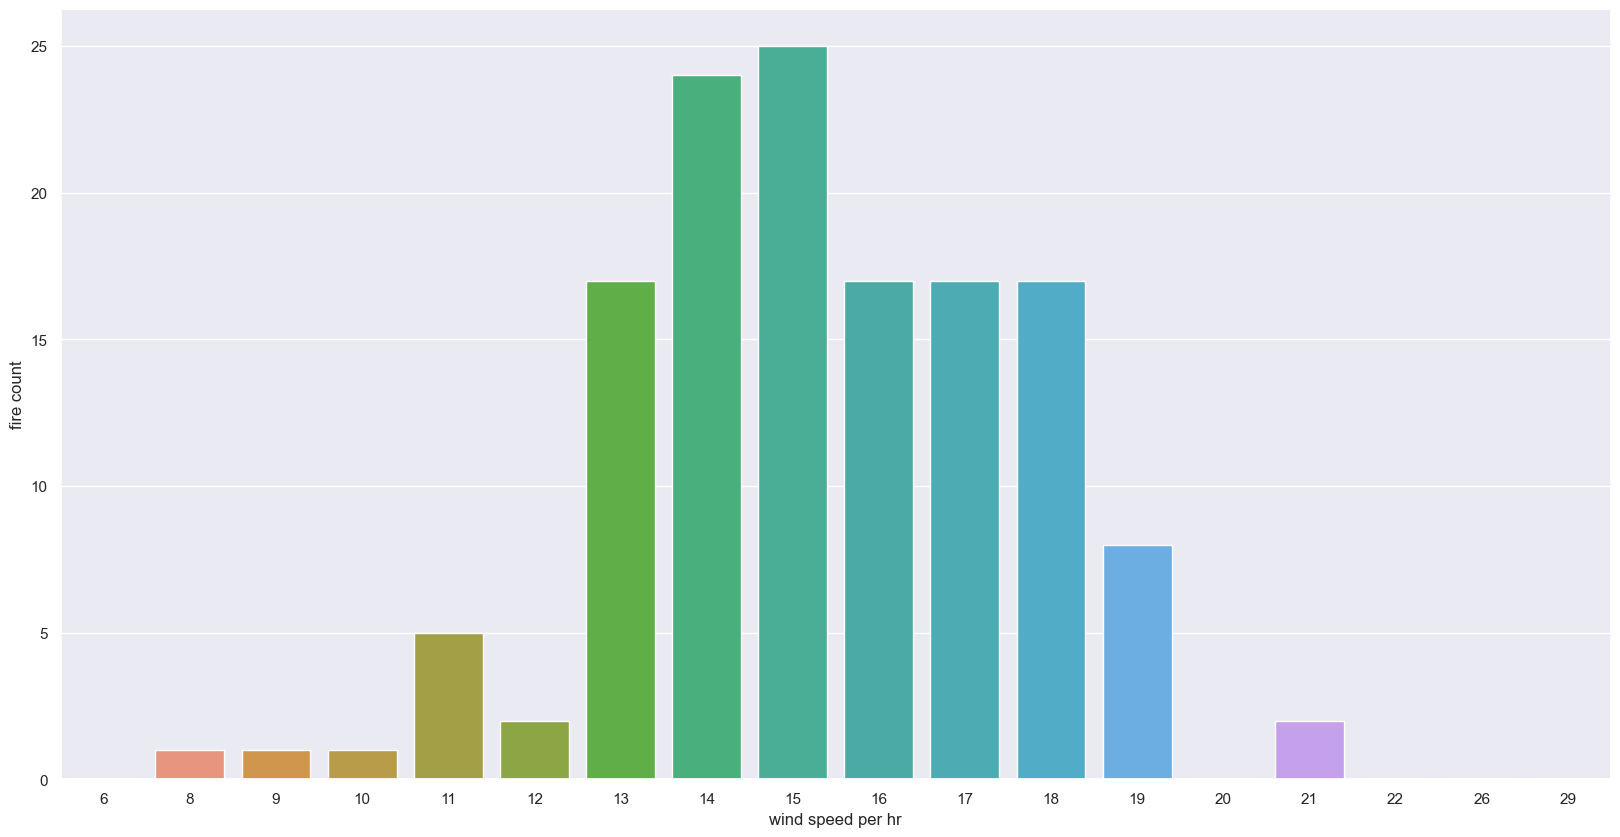

In [71]:
sns.barplot(data=sq,x="Ws",y="Classes")
plt.ylabel("fire count")
plt.xlabel("wind speed per hr")

In [74]:
sa=df.groupby(["Rain"],as_index=False)["Classes"].sum()
sa

,Rain,Classes
0,0.0,114
1,0.1,9
2,0.2,3
3,0.3,4
4,0.4,1
5,0.5,2
6,0.6,2
7,0.7,0
8,0.8,0
9,0.9,0


Text(0, 0.5, 'fire count')

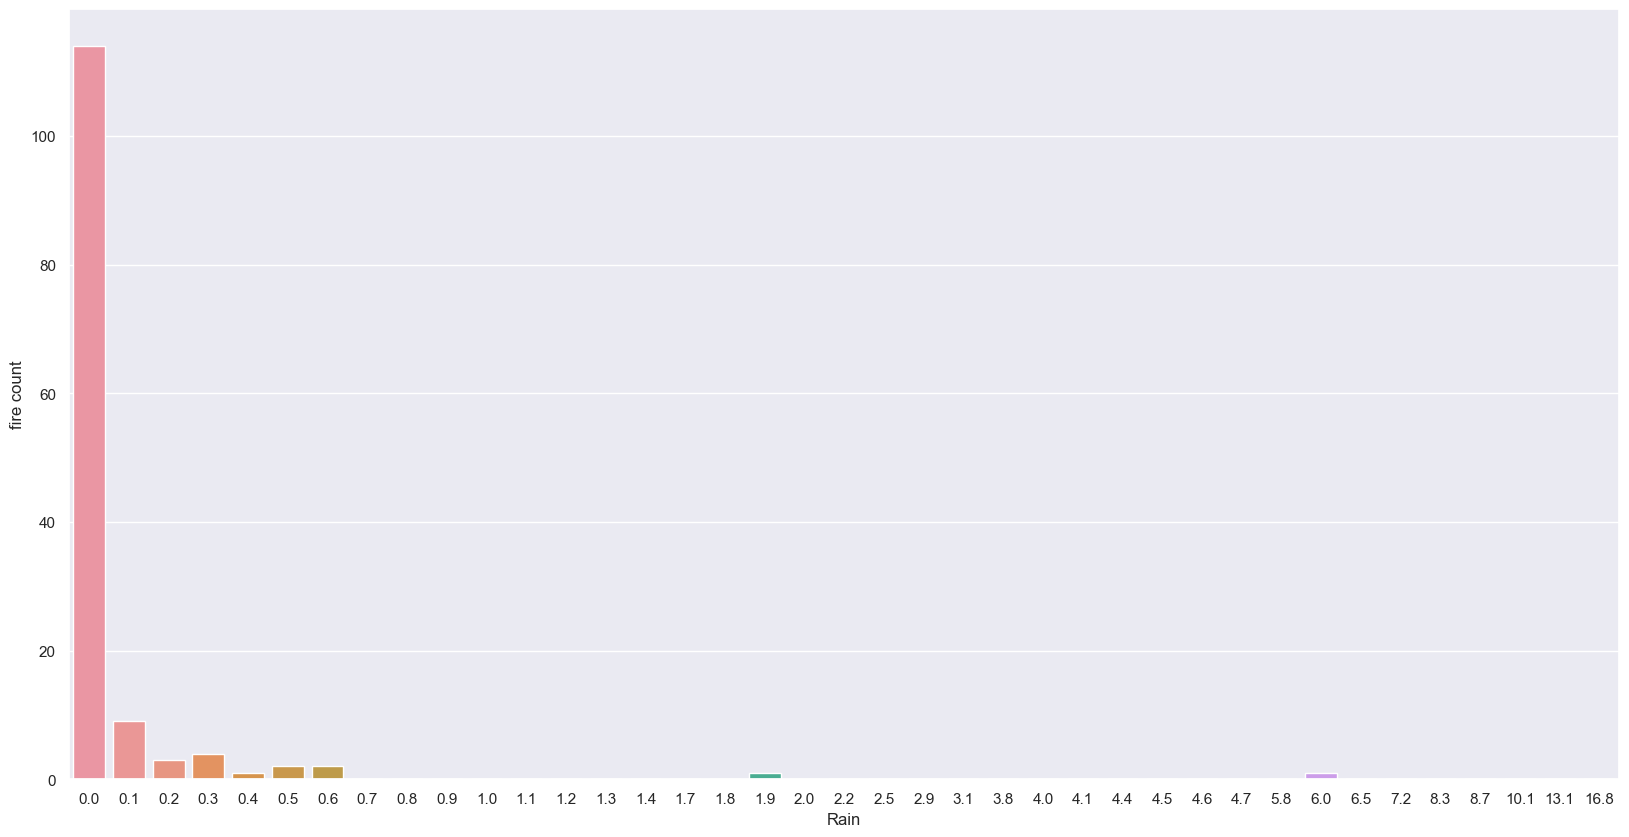

In [77]:
sns.barplot(data=sa,x="Rain",y="Classes")
plt.ylabel("fire count")

In [76]:
sd=df.groupby(["FFMC"],as_index=False)["Classes"].sum()
sd

,FFMC,Classes
0,28.6,0
1,30.5,0
2,36.1,0
3,37.3,0
4,37.9,0
...,...,...
168,93.8,1
169,93.9,2
170,94.2,1
171,94.3,1


Text(0, 0.5, 'fire count')

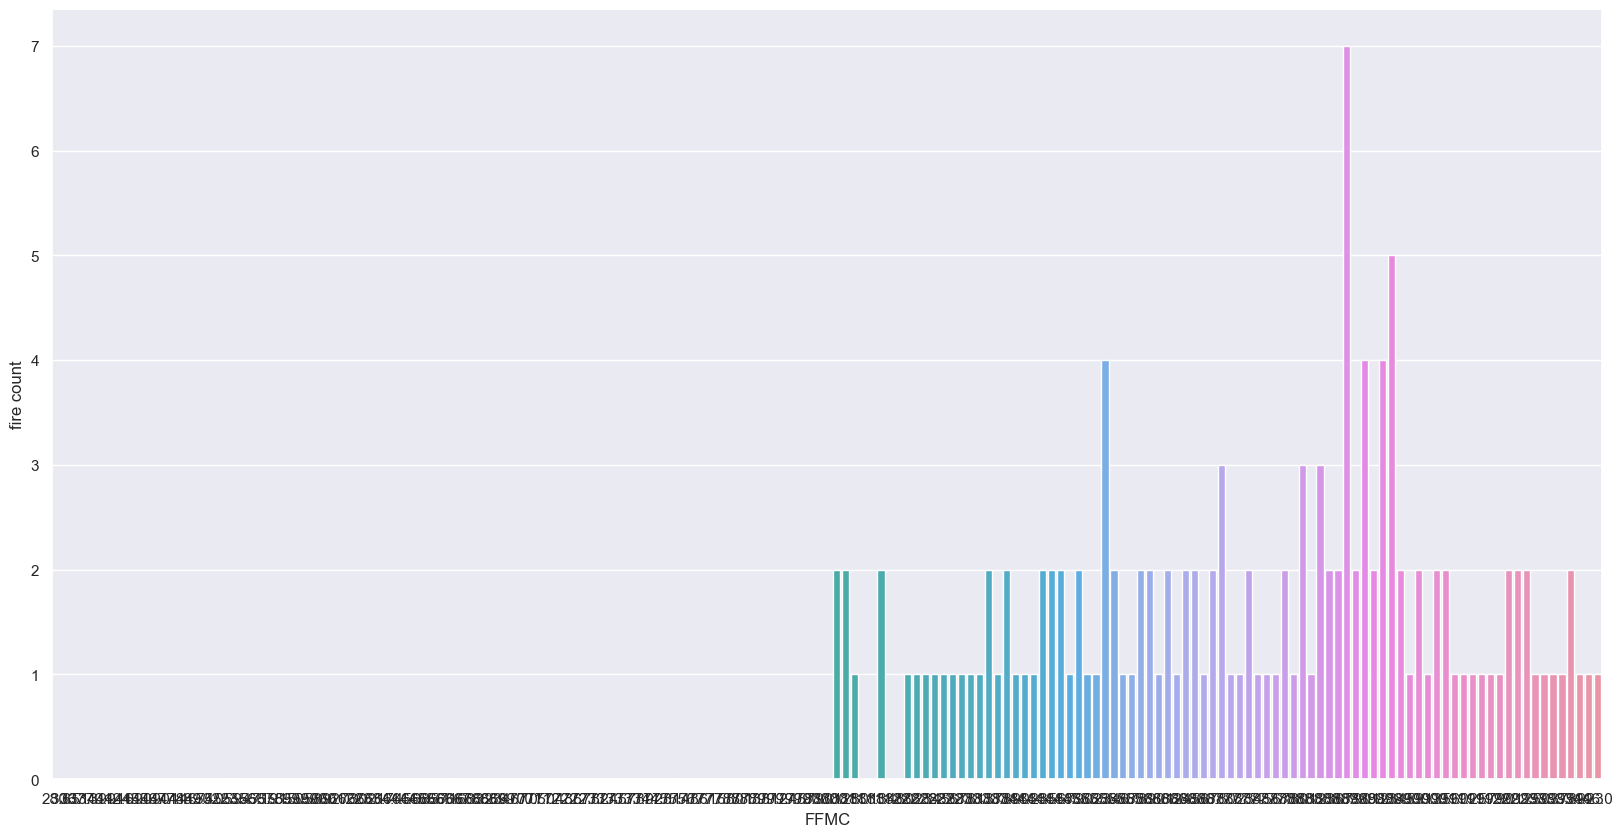

In [78]:
sns.barplot(data=sd,x="FFMC",y="Classes")
plt.ylabel("fire count")

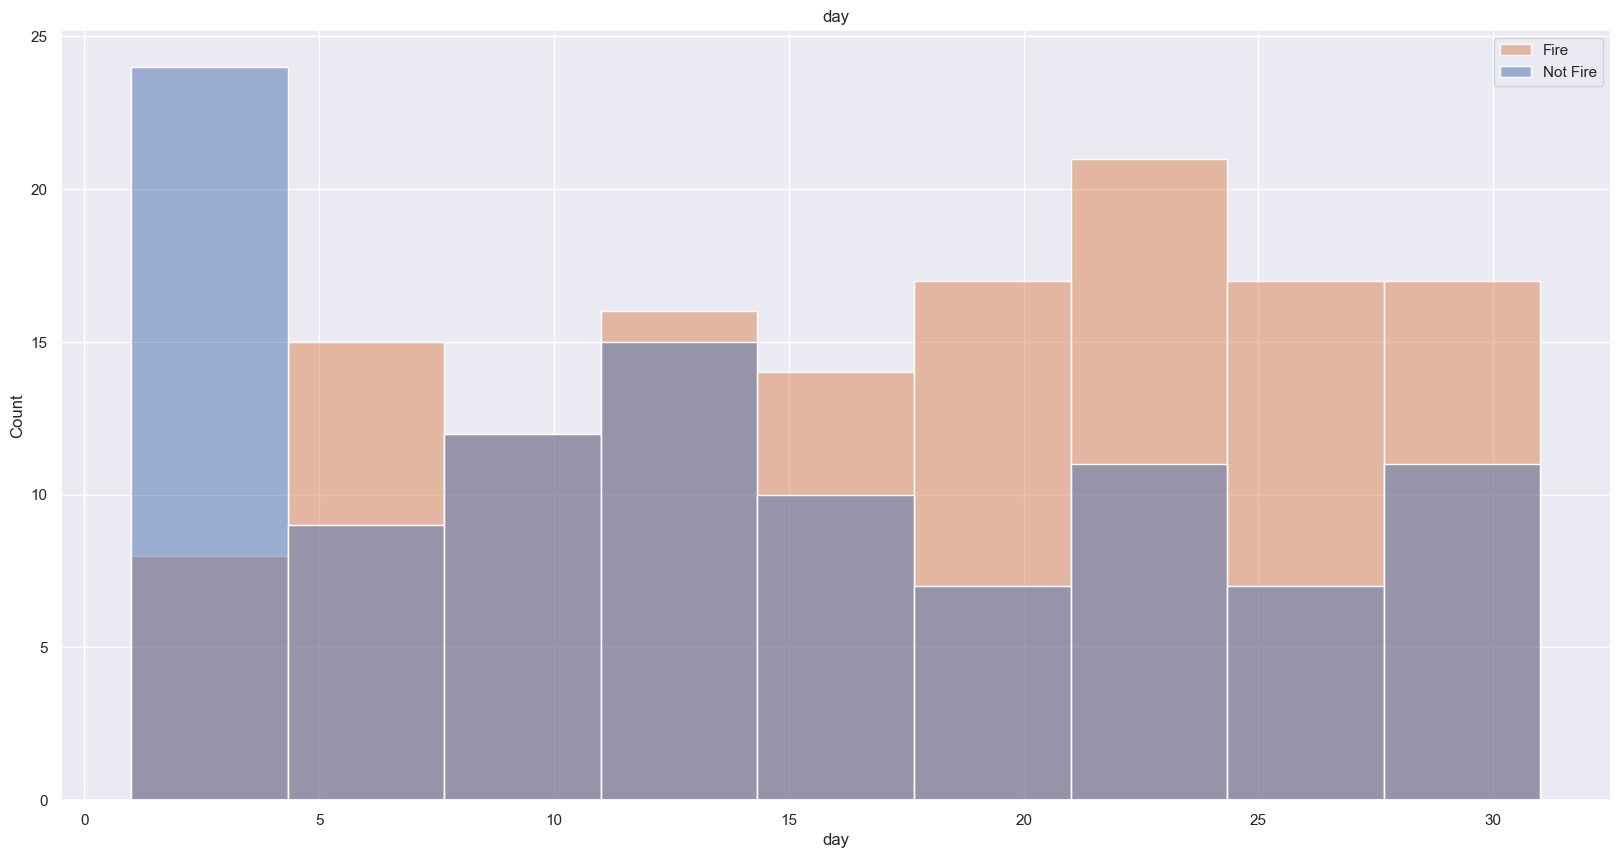

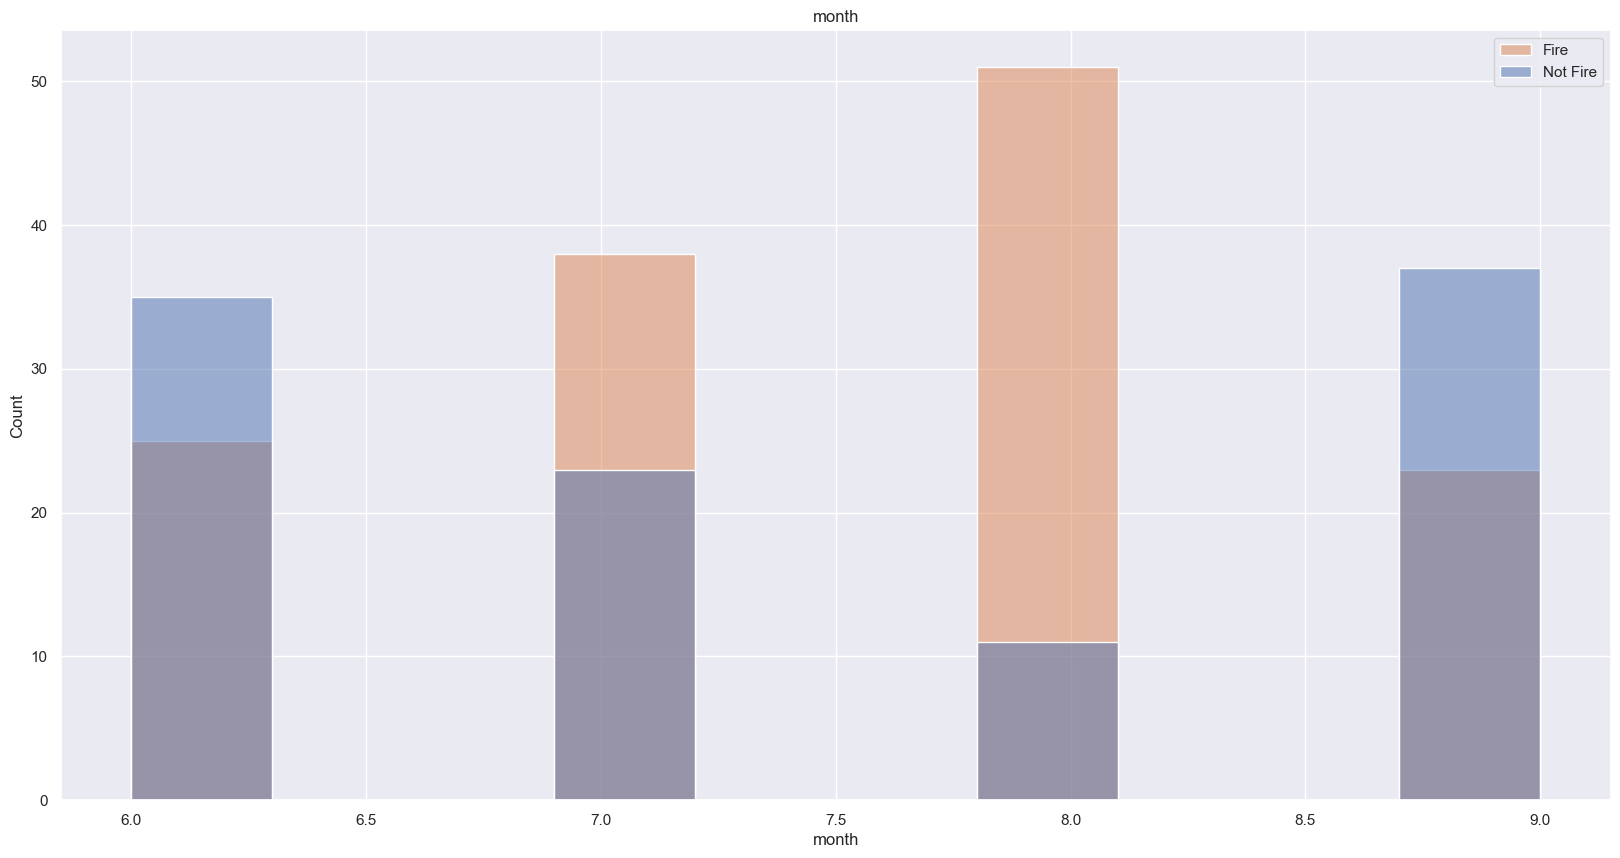

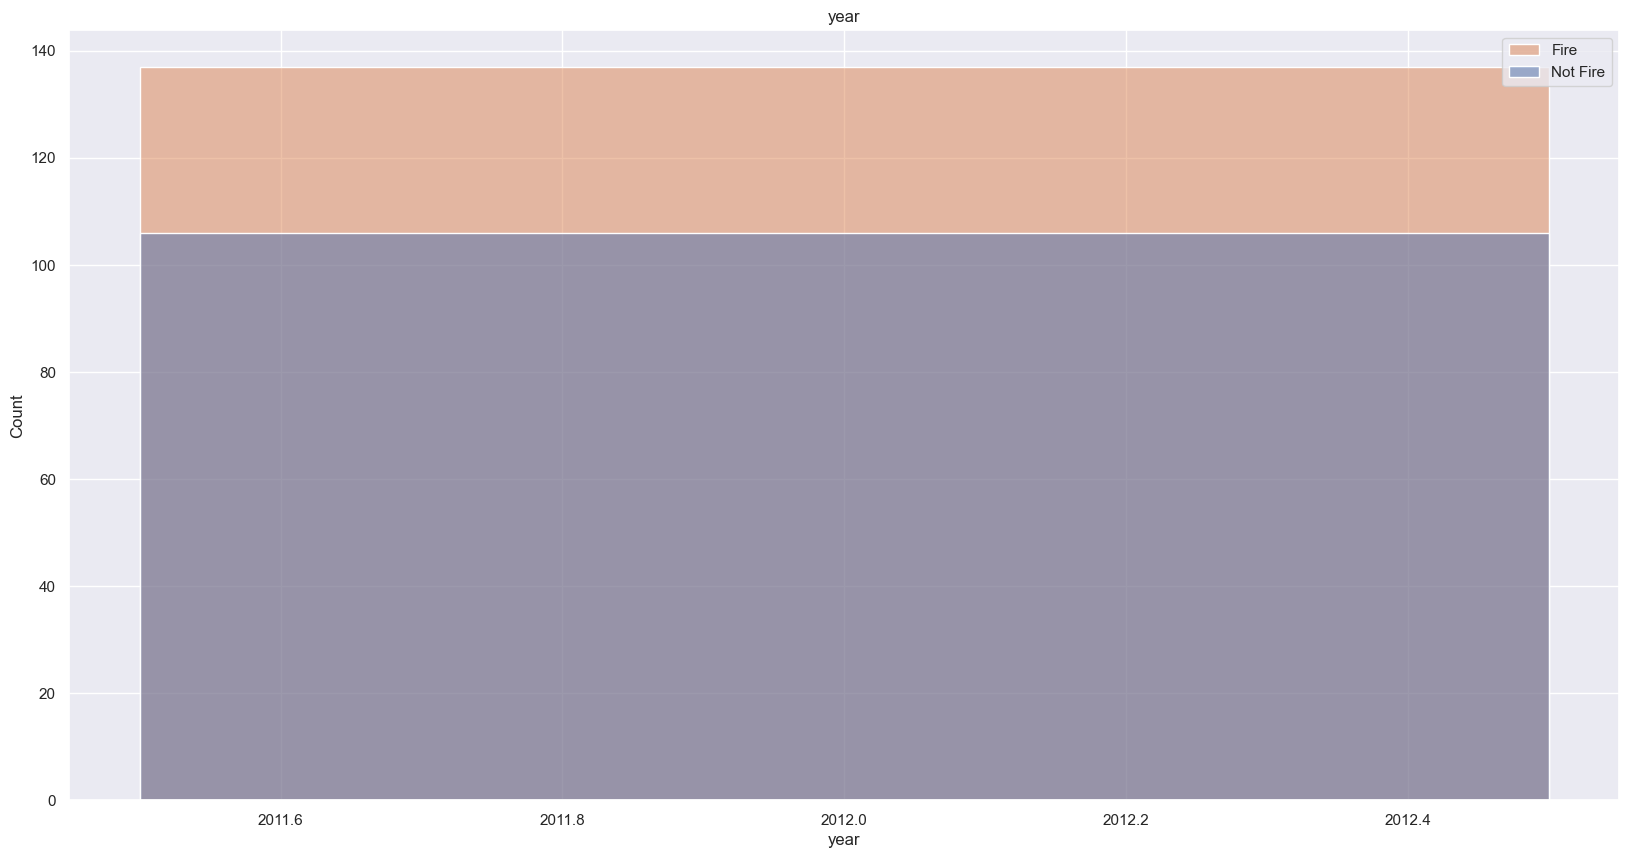

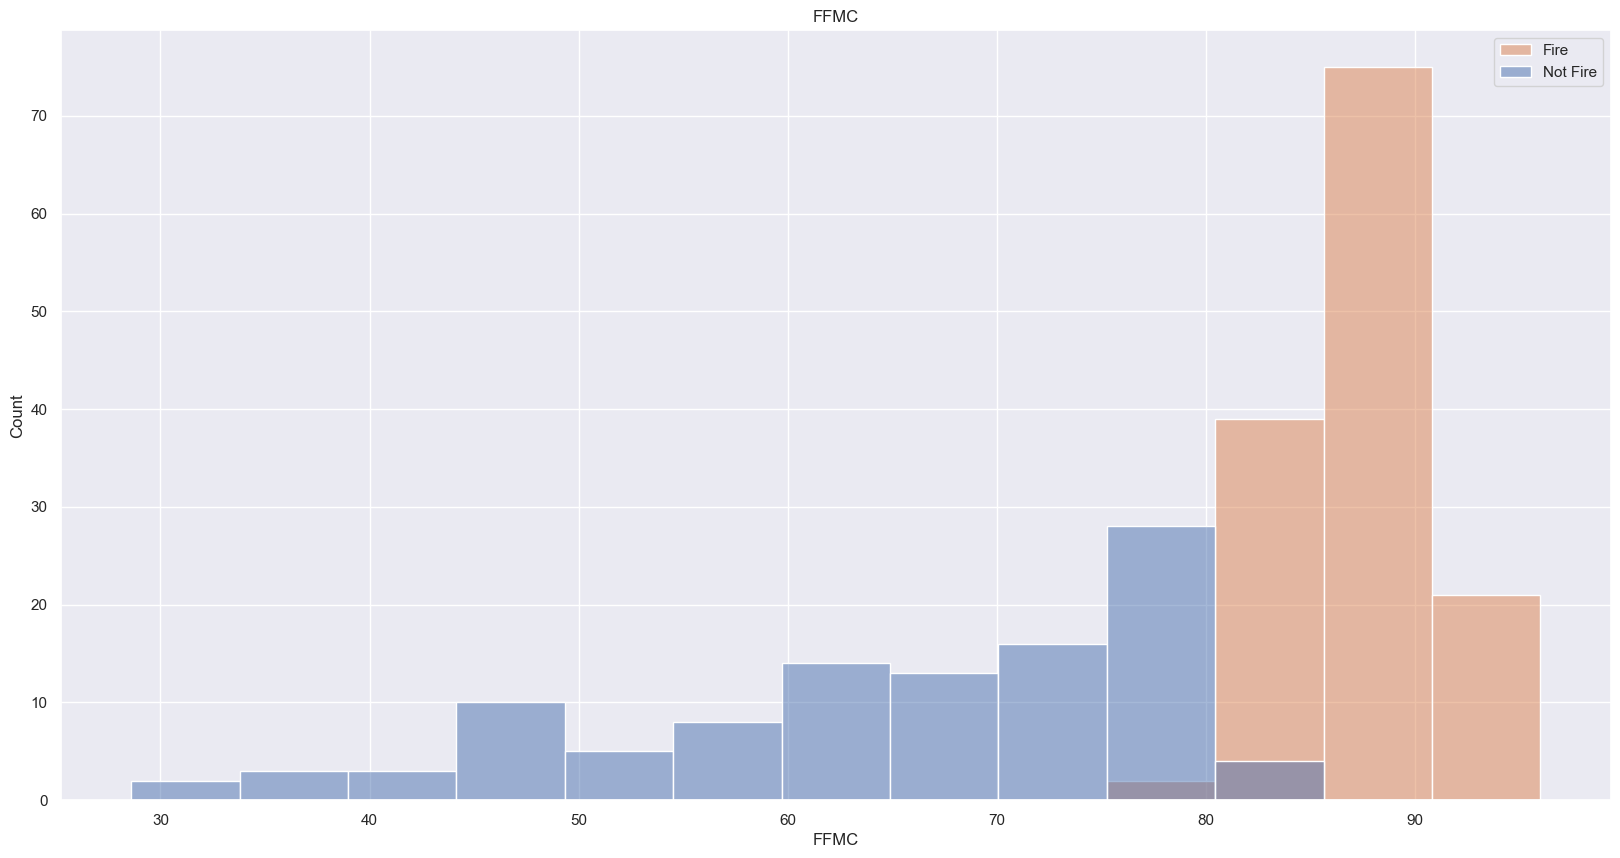

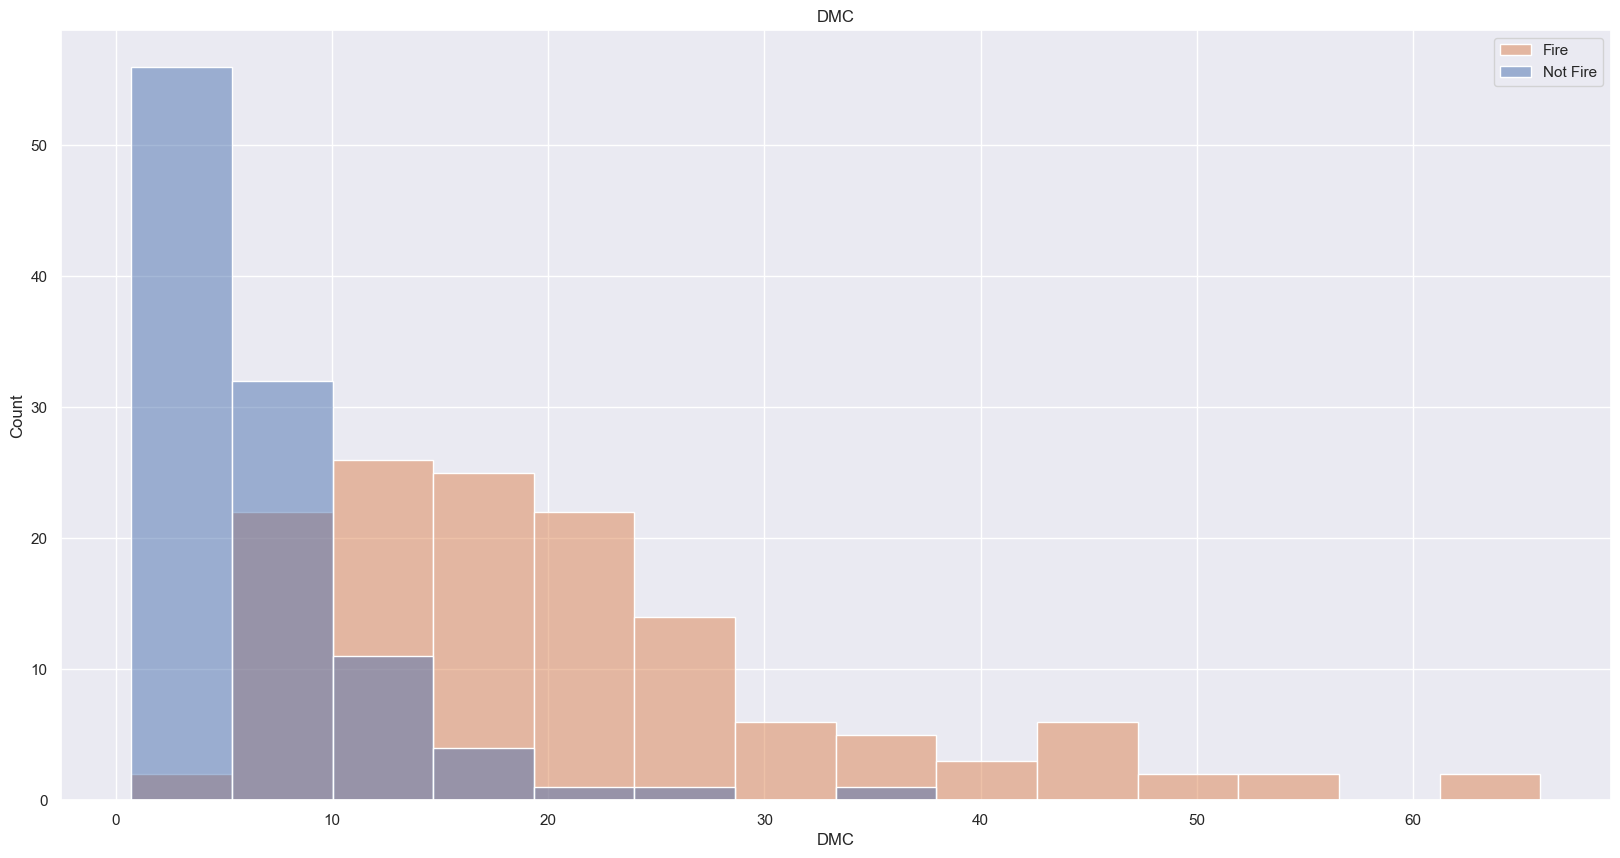

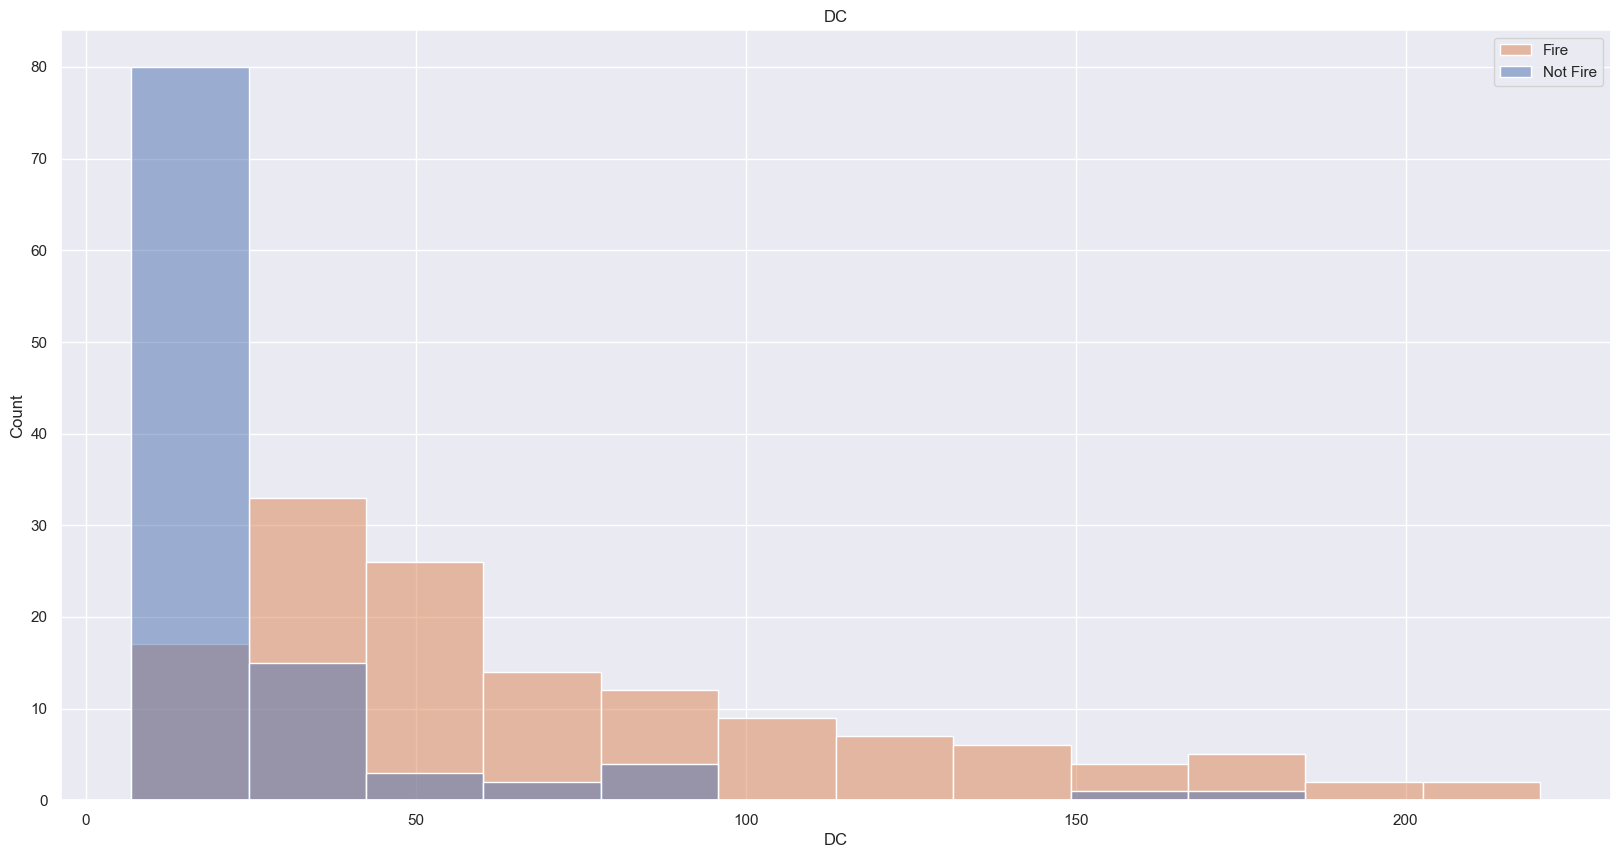

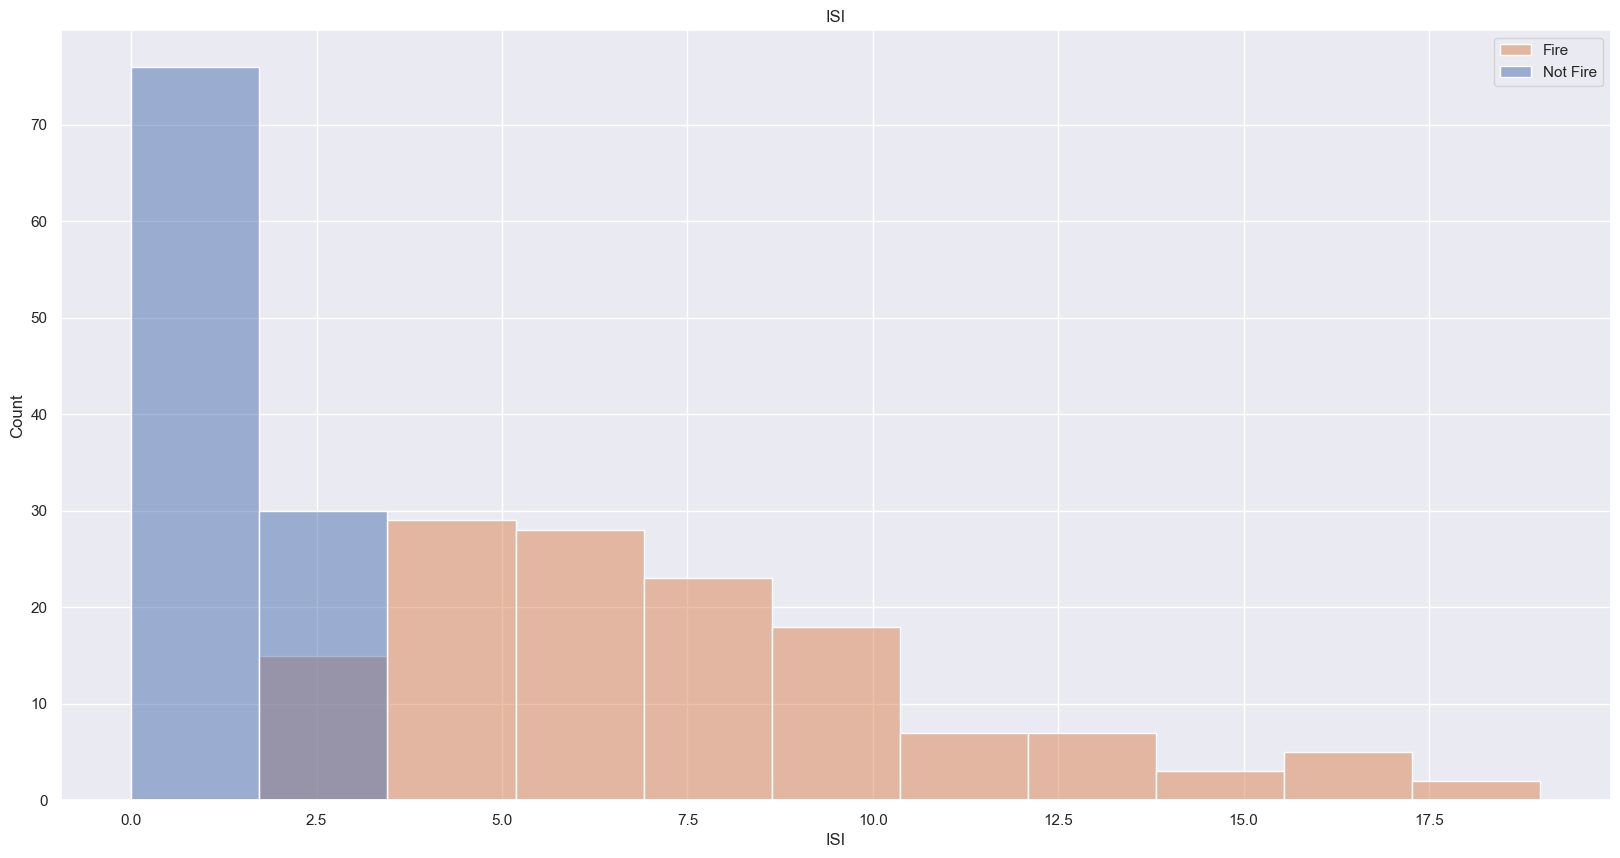

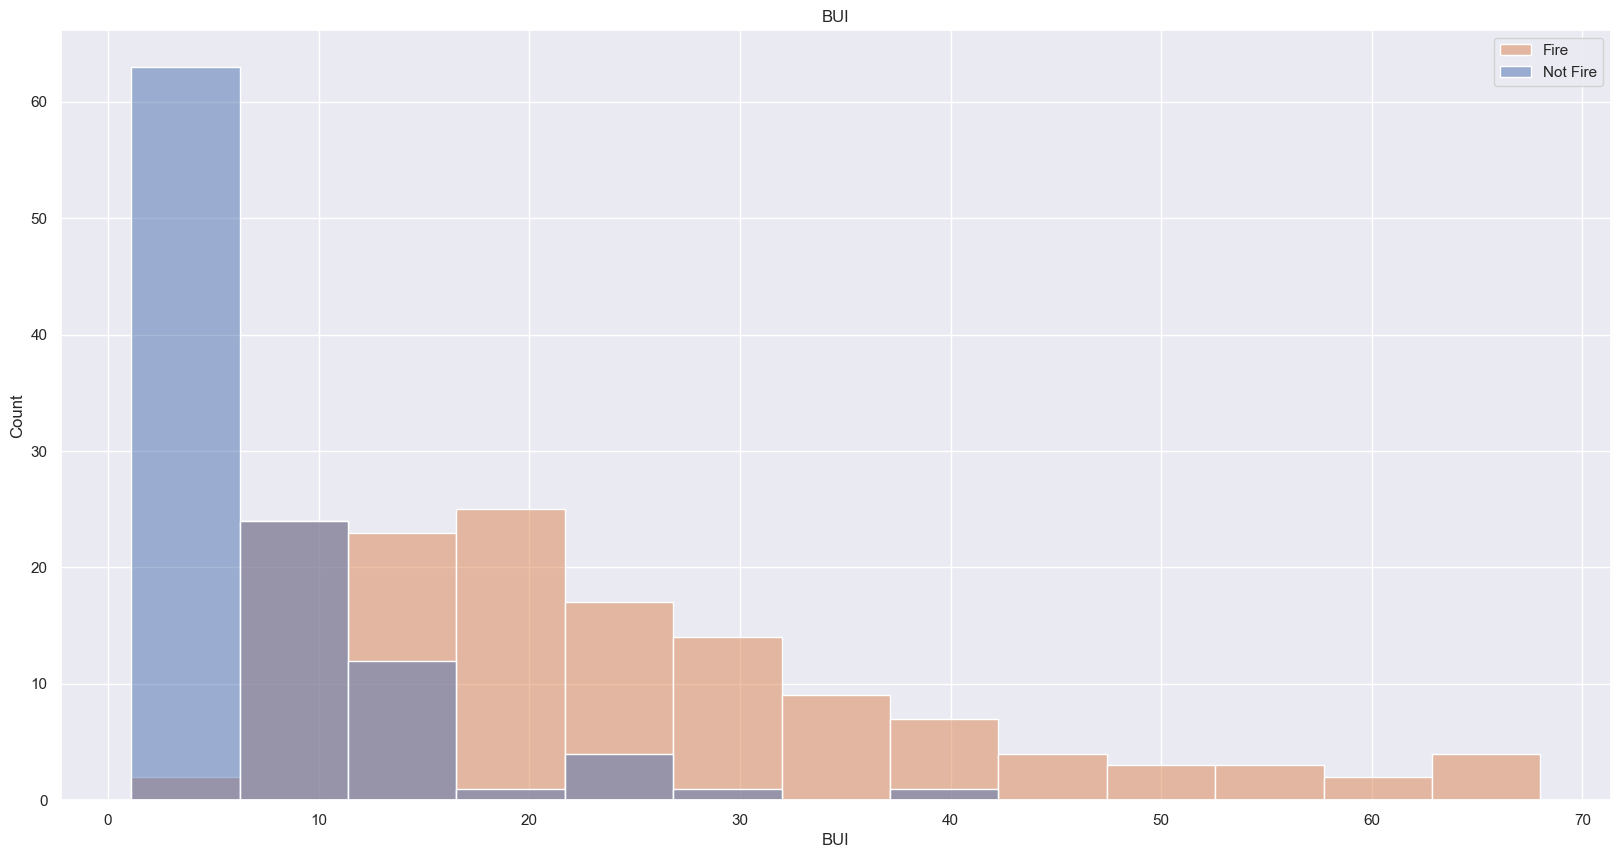

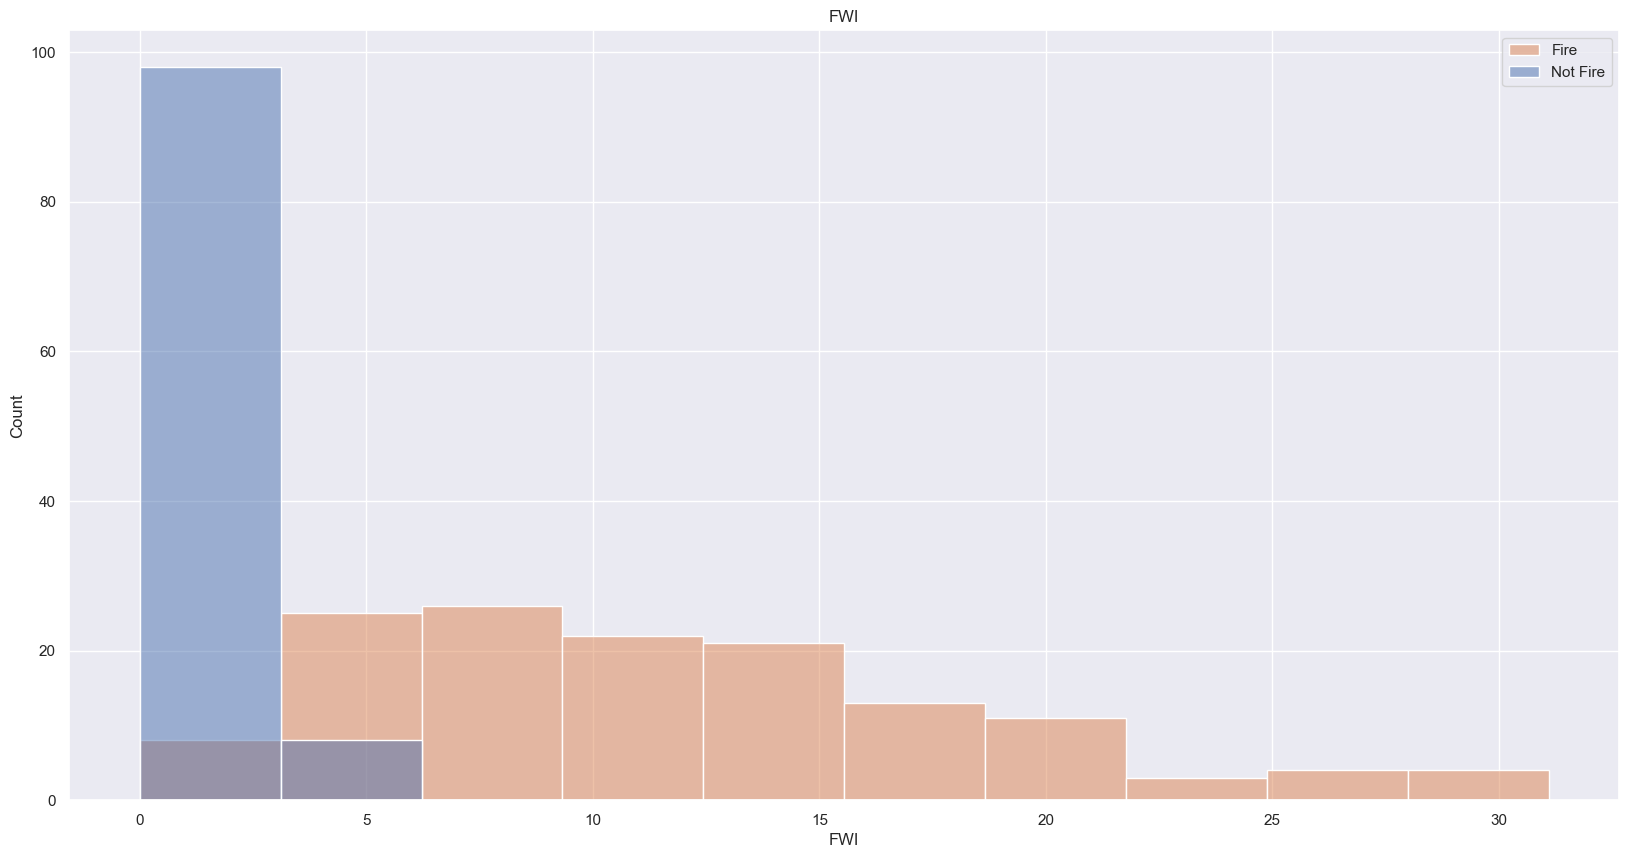

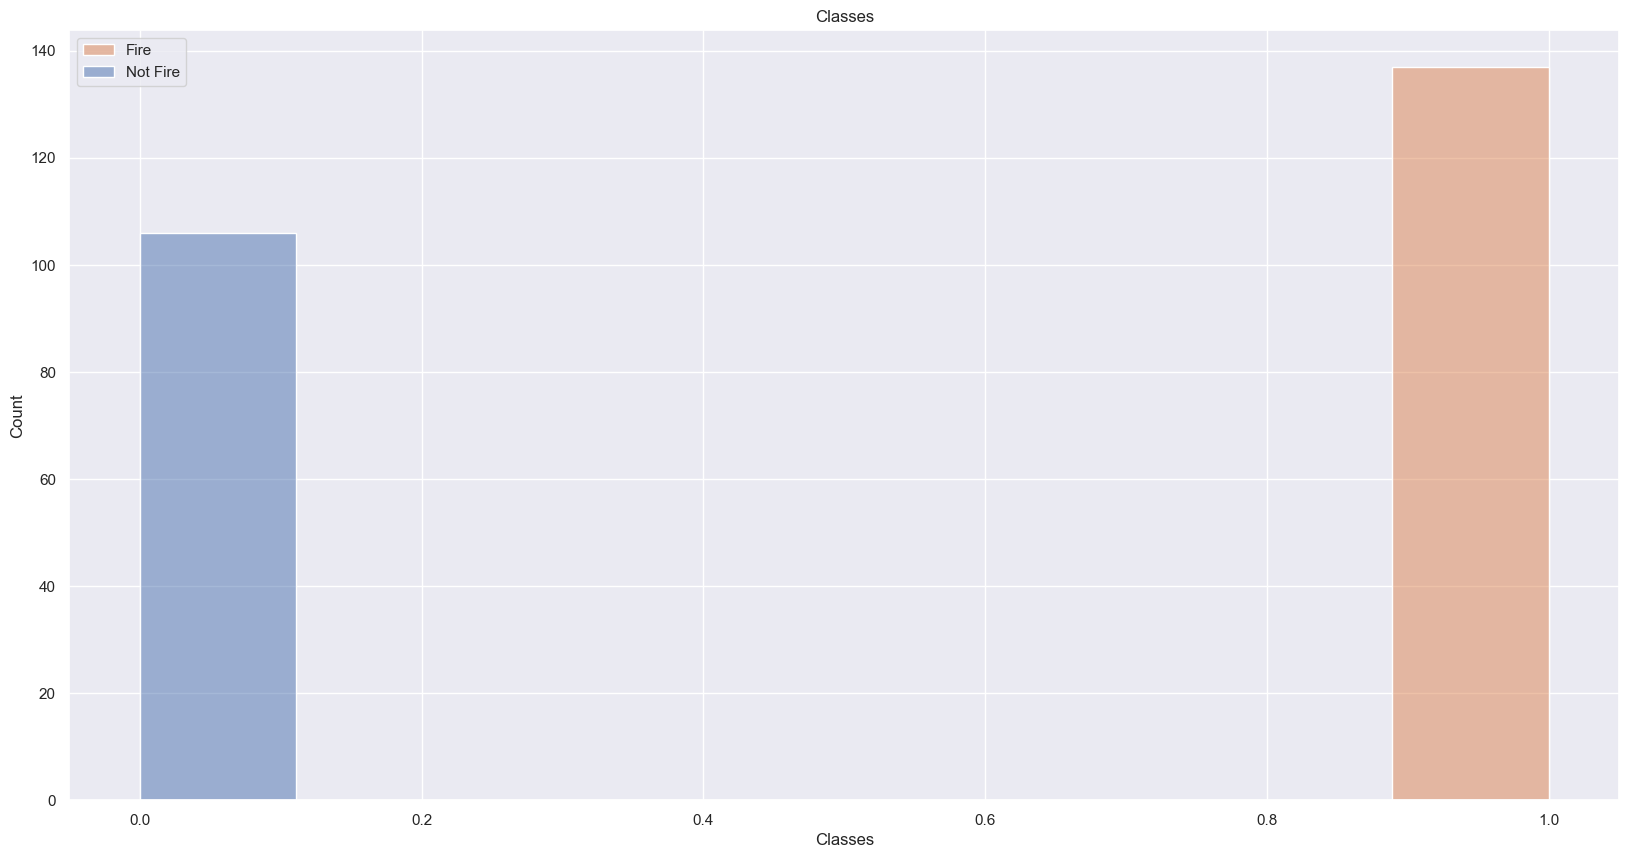

In [80]:
dftemp = dftemp = df.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

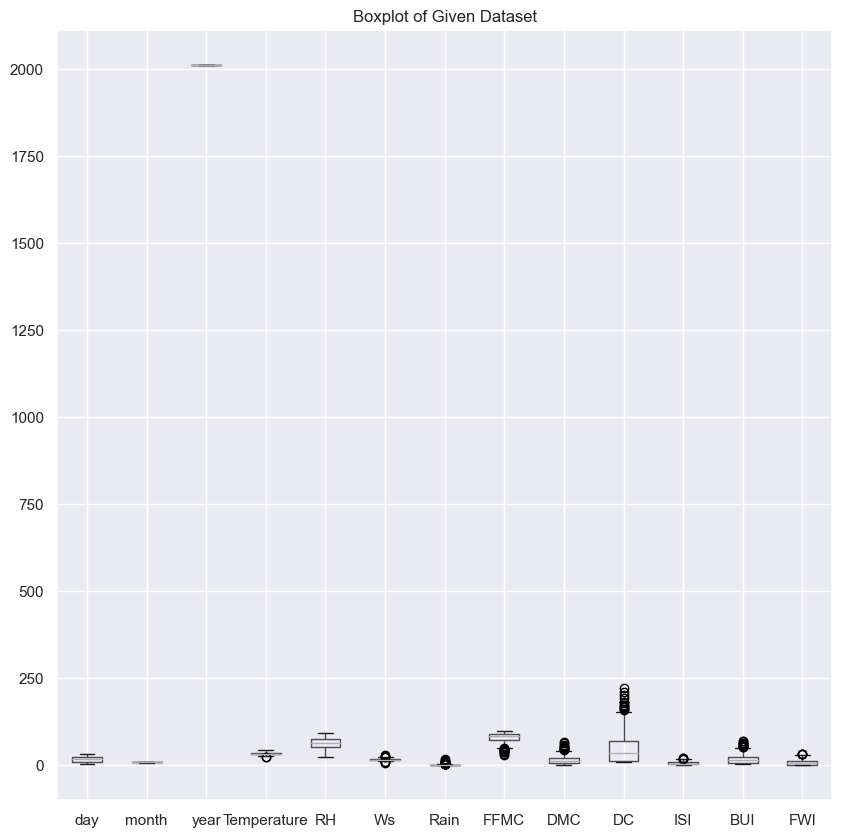

In [86]:
dftemp = df.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize =(10,10))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

# REPORT



## Weather System Report
    Temperature Highest Fire counts happened between 30-37 degree Celsius
    Rain Highest Fire counts happened when there was no rain to very less rain ie. 0.0 to 0.3.
    Wind Speed highest Fire count happened when the wind speed were between 13 to 19 Km/hr.
    Relative Humidity highest fire count happened when the RH is between 50 to 80%.
    FWI System Components Report
    FWI (Canadian Forest Fire Weather Index)

    Fine Fuel Moisture Code (FFMC) index which ranges between 28.6 to 92.5, here above 75 has higher chance of Forest fires.

    Duff Moisture Code (DMC) index which ranges between 1.1 to 65.9, here 1.1-10 has lower chance of Forest fires whereas above 10-30 DMC has  very high evidence of Forest fires in past.

    Drought Code (DC) index which ranges between 7 to 220.4, here 0-25 is safe and has lower chance of Forest fires whereas range above 25 DC has higher chance of forest fires.

    Initial Spread Index (ISI) index which ranges between 0 to 18, here 0-3 has lower Forest fires and above 3 ISI has higher chance of Forest fires.

    Buildup Index (BUI) index which ranges between 1.1 to 68, here 1.1 to 10 has lower Forest fire chance and above 10 BUI has higher chance of forest fires.

    Fire Weather Index (FWI) Index which ranges between 1 to 31.1, here 0-3 has lower chance of Forest fires and 3-25 FWI has higher chance of forest fires.